**Predicting Fuel Economy - Linear- Regression based Analysis**


**Objective: **
The goal of this project is to develop a linear regression model to predict the fuel efficiency (miles per gallon - MPG) of cars based on various automobile characteristics such as weight, horsepower, displacement, acceleration, and model year. By analyzing historical automotive data, we aim to identify the key factors influencing fuel economy and build a robust predictive model.

**Data Preparation**



*   Read the dataset into pandas dataframe.




*   Check the data types and values of each column.
*   Check for any missing or unusual values.


*   Cast origin column as a text datatype.



In [95]:
import pandas as pd
import seaborn as sns

mpg = pd.read_csv('auto-mpg.csv')

mpg.head()     #mpg -- 'miles per gallon'

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [96]:
mpg.info()

# Based on the non-null count seen below, we can infer that there are no missing values in the data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [97]:
# Casting 'origin' column as object datatype since it represents categorical data

mpg['origin'] = mpg['origin'].astype(object)

mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [98]:
mpg['horsepower'].unique()

# As seen below, there is a value '?' which is inconsistent within this group. We will query this data here and fill in with any missing values logiv

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [99]:
mpg.query("horsepower == '?' ")

# There are few records which have the value '?'. We will convert this into a numeric column to fill in the values appropriately.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [100]:
mpg['horsepower'] = pd.to_numeric(mpg['horsepower'], errors = 'coerce')

# The horsepower column has been converted into numeric type from object and the use of coerce here will fill in any missing values of numeric type

mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())

# We are now going to fill in with the mean of the column for these missing values.

mpg.query("horsepower == '?' ")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [101]:
mpg.info()

# Horsepower column does not have any missing values now.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


**Exploratory Data Analysis**

Here we will calculate the summary statistics for each of the numeric columns in the dataset, including min, max, and mean. We will then build a histogram of the target variable 'mpg'.

In [102]:
# Calcualte summary statistics

mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<Axes: xlabel='mpg', ylabel='Count'>

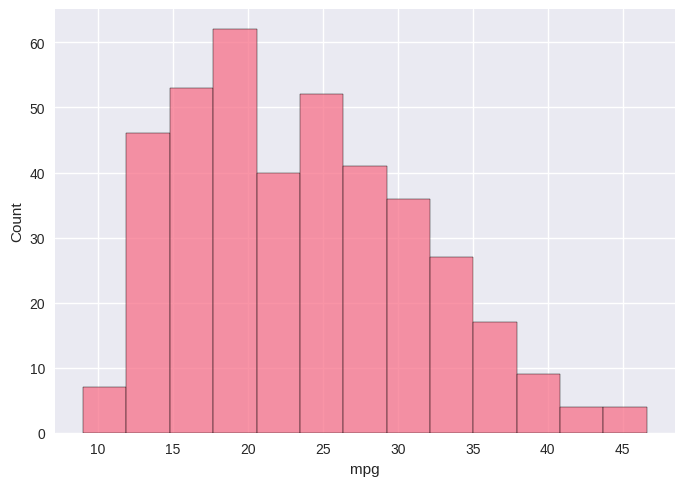

In [103]:
# Building a histogram of our target variables('mpg')

sns.histplot(mpg['mpg'])



*  The range of the values is between 10 to 45 , it looks normal and little skewed towards the end. Overall , it looks pretty normal




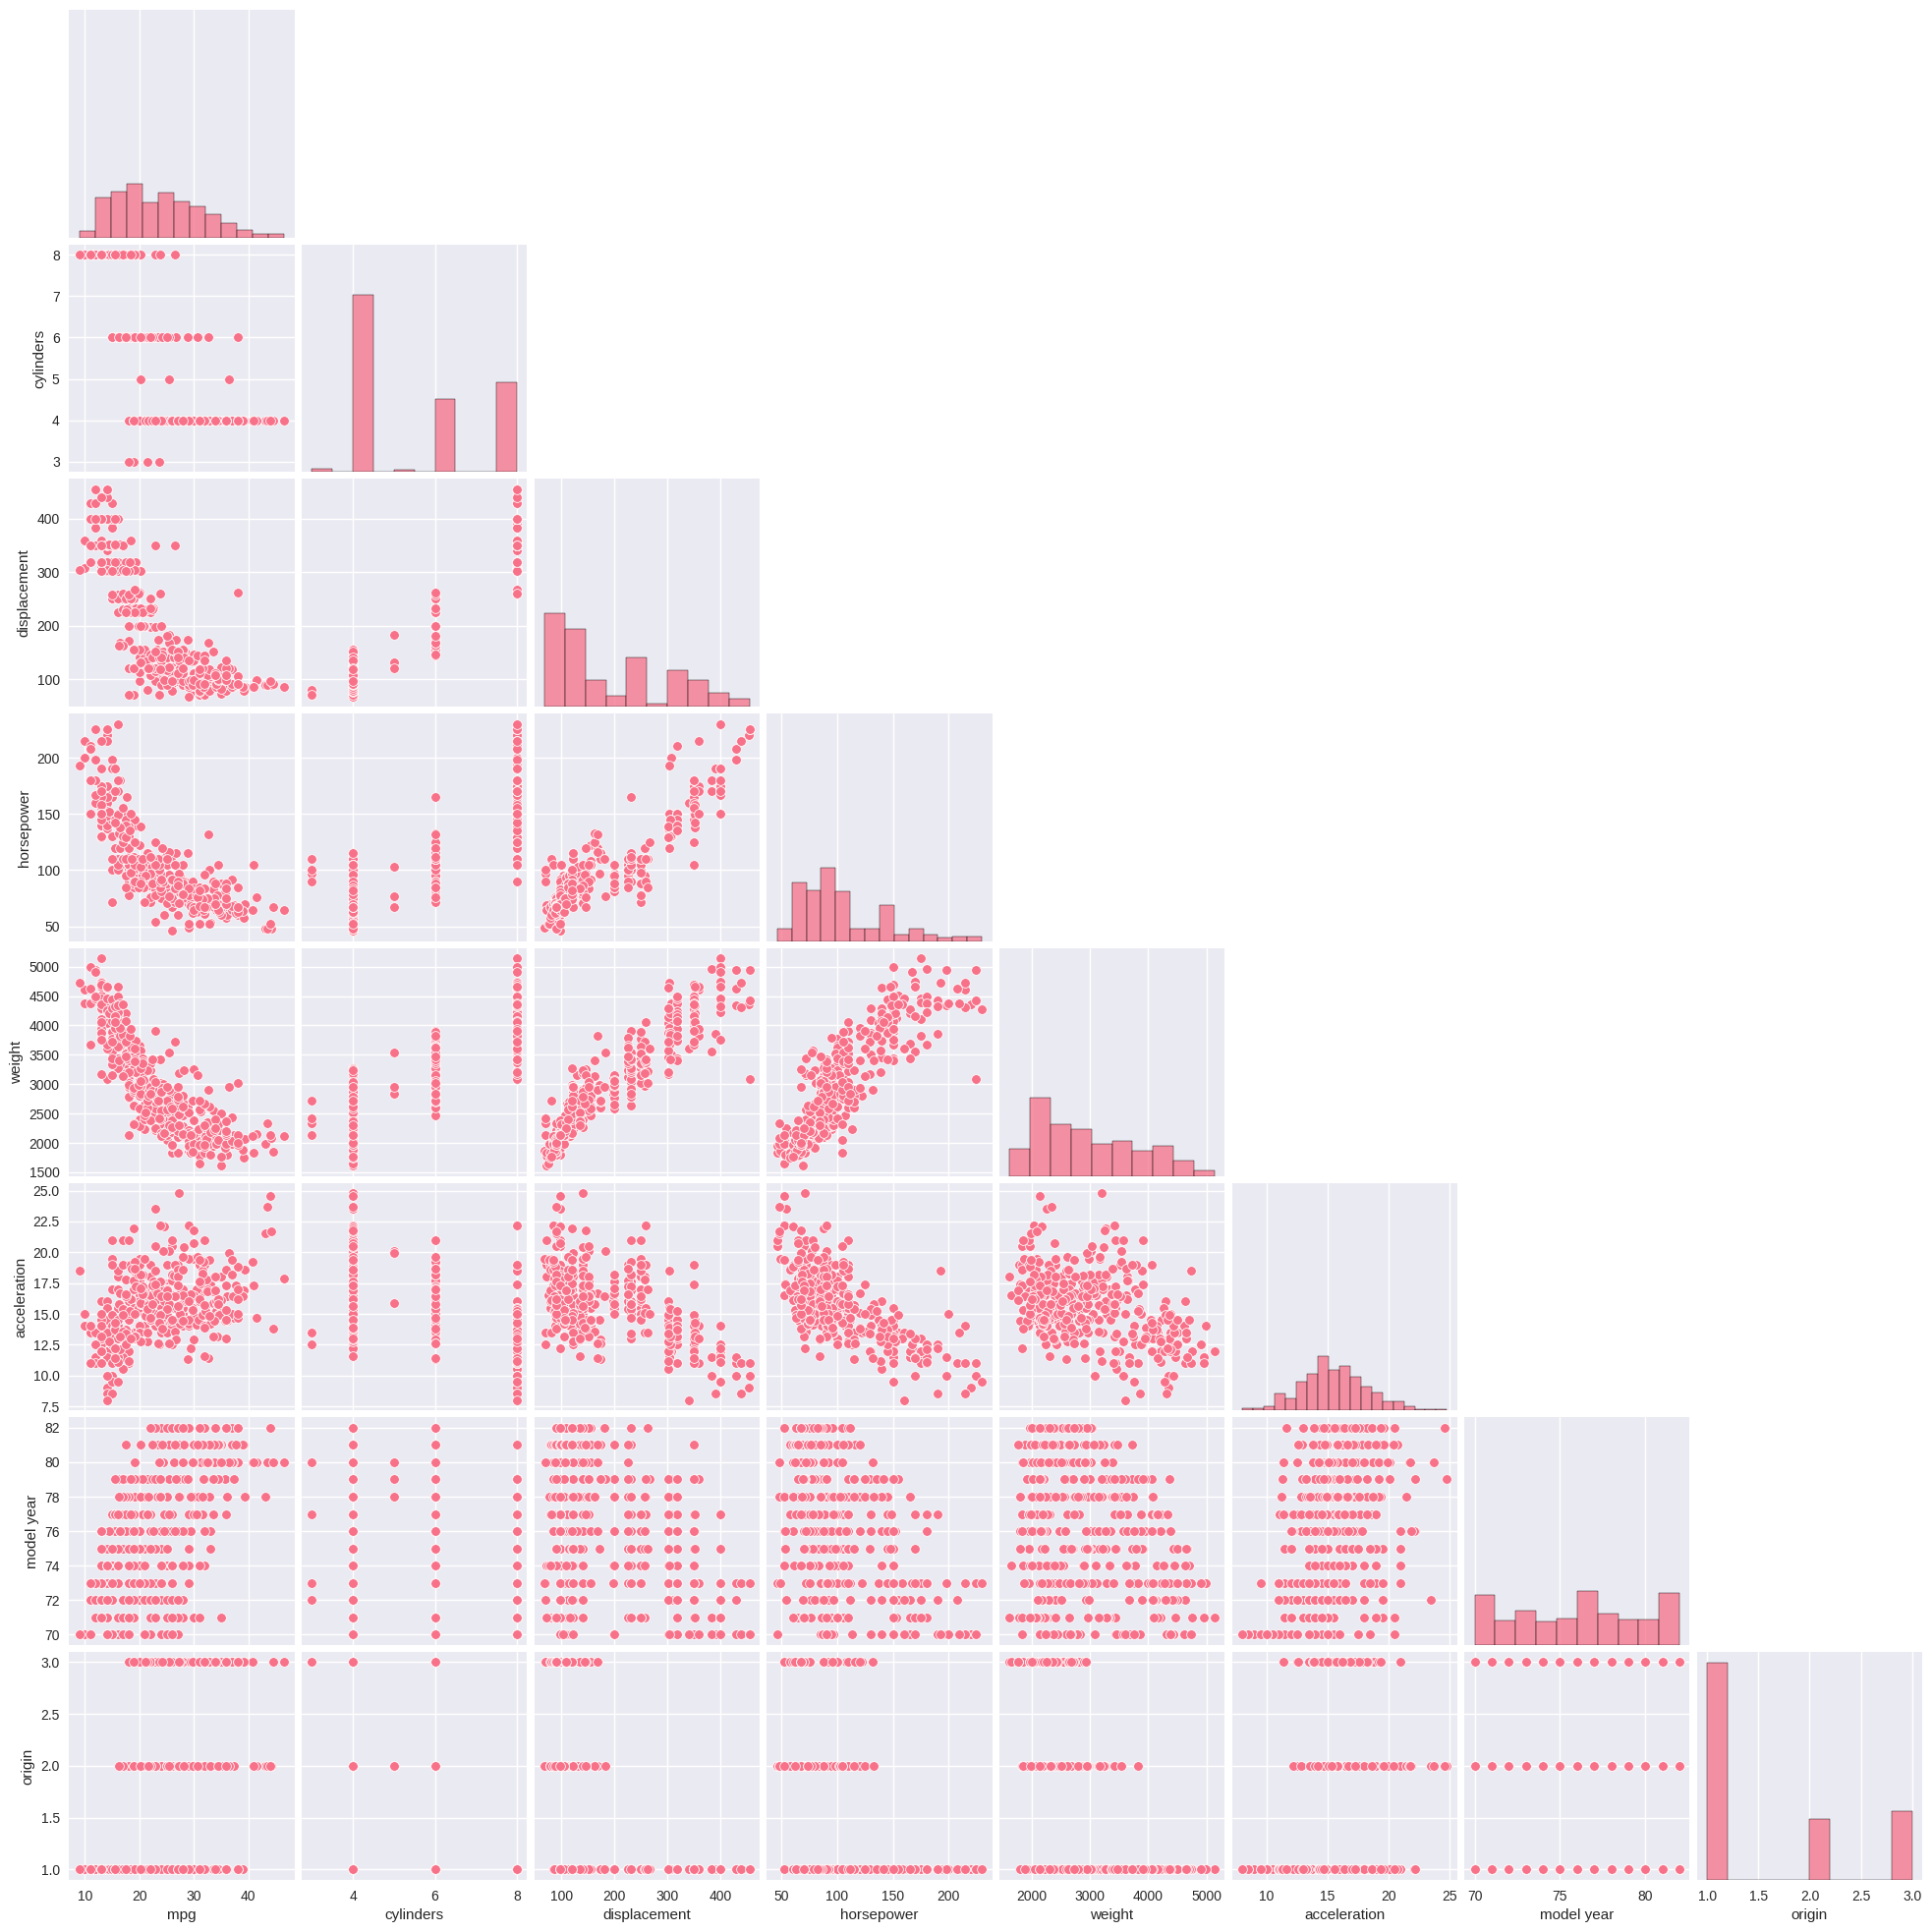

In [104]:
# Next we will explore feature target relationships. Relationships between the features and the 'mpg' column.

sns.pairplot(mpg, corner=True)          #  this will return scatter plot relationships for all the numeric variables



*   A lot of the below features deals with the amount of power a car has. Generally, the more powerful the car is, the more fuel it uses per mile.
*   The relationship between horsepower, displacement , weight and the target variable looks extremely similar.

<Axes: xlabel='origin', ylabel='mpg'>

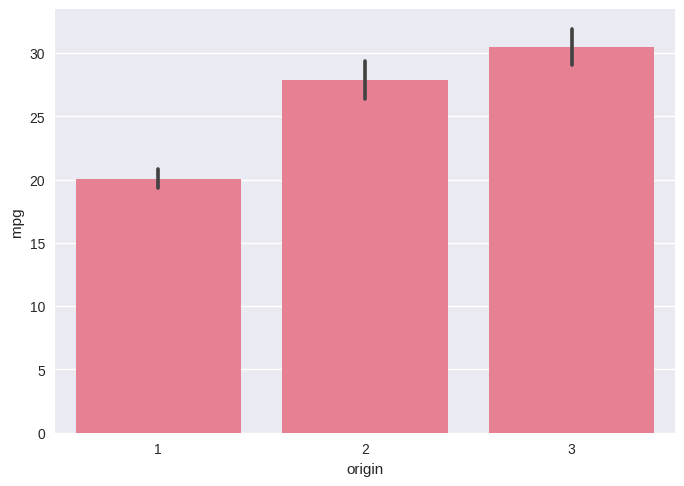

In [105]:
#Visualizing average fuel economy(mpg) by car origin

sns.barplot(data=mpg,x='origin',y='mpg')



*   Average american car has an fuel economy of ~20 miles per gallon and Japanese cars are about ~30.

*   This helps analyze if car manufacturing location influences fuel economy.



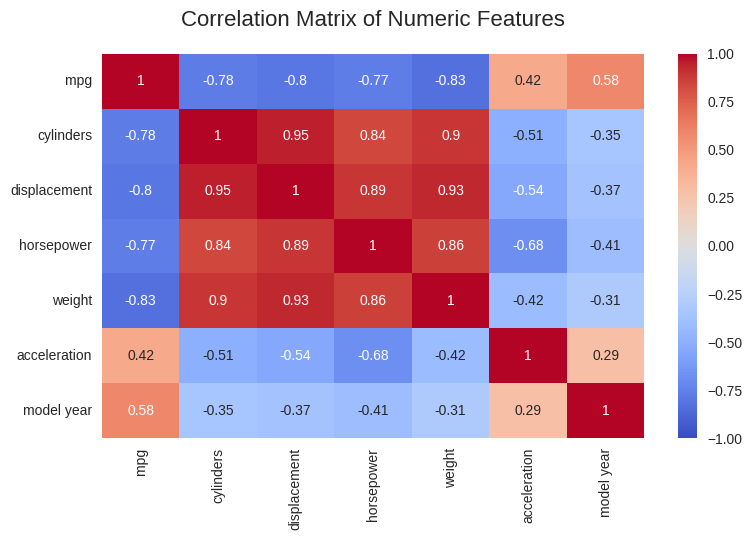

In [108]:
# Plot Heatmap
numeric_cols = mpg.select_dtypes(include=np.number) # Select only numeric columns

sns.heatmap(numeric_cols.corr(), # Calculate correlation only on numeric columns
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True)

plt.title('Correlation Matrix of Numeric Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()



---



*   Red means positive correlation and blue means negative correlation

*   Weight has a strong negative correlation (-0.83) with MPG which means heavier cars consume more fuel.
*   Cylinders, displacement, horsepower, and weight are highly correlated which suggests potential multicollinearity.


*   Acceleration & model year show a positive correlation with MPG.

**Modelling Phase of the Project**



*   We need to split our data and build a model.




In [110]:
# Feature Engineering
# Create polynomial features for weight, acceleration, and horsepower

mpg_model = mpg.assign(
    weight2 = mpg['weight'] ** 2,
    weight3 = mpg['weight'] ** 3,
    accel2 = mpg['acceleration'] ** 2,
    accel3 = mpg['acceleration'] ** 3,
    hp2 = mpg['horsepower'] ** 2,
    hp3 = mpg['horsepower'] ** 3,
).drop("car name",axis=1)

# Convert categorical variables into dummy variables
mpg_model = pd.get_dummies(mpg_model)     # This avoids redundant dummy variables

In [111]:
mpg_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,weight3,accel2,accel3,hp2,hp3,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,43022168064,144.00,1728.000,16900.0,2197000.0,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,50366053557,132.25,1520.875,27225.0,4492125.0,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,40565745856,121.00,1331.000,22500.0,3375000.0,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,40459583737,144.00,1728.000,22500.0,3375000.0,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,41027927849,110.25,1157.625,19600.0,2744000.0,True,False,False


In [112]:
# Initially we are going to split the data into train and test and do cross validation.

from sklearn.model_selection import train_test_split
from sklearn.model_selection  import KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
import statsmodels.api as sm

features = ['weight',
           'weight2',
           'cylinders',
           'displacement',
           'horsepower',
            'hp2',
            'hp3',
           'acceleration',
            'accel2',
            'accel3',
           'model year',
           'origin_2',
           'origin_3']

# Adding a constant for the regression model

X = sm.add_constant(mpg_model[features])
y = mpg_model['mpg']

# Splittig into training and test sets

x, X_test, y, y_test = train_test_split(X, y, test_size= .2, random_state=2023)

In [113]:
# Re-aligning the X , values and reset the indices

X, y = X.align(y, join="inner", axis=0)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [115]:
# Now fitting a baseline regression model using the feature with the strongest correlation to the target 'mpg'.

kf = KFold(n_splits=5,shuffle=True, random_state=2023)
import numpy as np

# Create list to store validation stores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Convert boolean columns to integers
X['origin_2'] = X['origin_2'].astype(int)
X['origin_3'] = X['origin_3'].astype(int)


# Loop through each fold in X and Y

for train_ind, val_ind in kf.split(X,y):
    # subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val , y_val = X.iloc[val_ind],y.iloc[val_ind]
    # Fit the model on fold's training data
    model = sm.OLS(y_train,X_train).fit()
    # Append Validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

print("All validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All cross validation MAEs: ", [round(x,3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae),3)} +- {round(np.std(cv_lm_mae), 3)}")

All validation R2s:  [0.876, 0.812, 0.902, 0.814, 0.883]
Cross Val R2s: 0.857 +- 0.037
All cross validation MAEs:  [2.199, 2.69, 1.966, 2.295, 1.915]
Cross Val MAEs: 2.213 +- 0.277




*   The model performs well, explaining ~85.7% of the MPG variation.
*   The error (~2.2 MPG) is reasonable but could be optimized.


*   The model is consistent across different train-test splits, meaning it's not overfitting.






In [116]:
# Setting up residual analysis plots for residual analysis

def residual_analysis_plots(model):
    import scipy.stats as stats
    import matplotlib.pyplot as plt

    predictions = model.predict()
    residuals = model.resid

    fig, ax = plt.subplots(1, 2, sharey='all',figsize=(10, 6))

    # Residuals v/s Predictions Plot
    sns.scatterplot(x=predictions,y=residuals, ax = ax[0])
    ax[0].set_title('Residual_plot')
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")

    # Normal Q-Q plot
    stats.probplot(residuals, dist='norm',plot=ax[1])
    ax[1].set_title("Normal Q-Q  Plot")

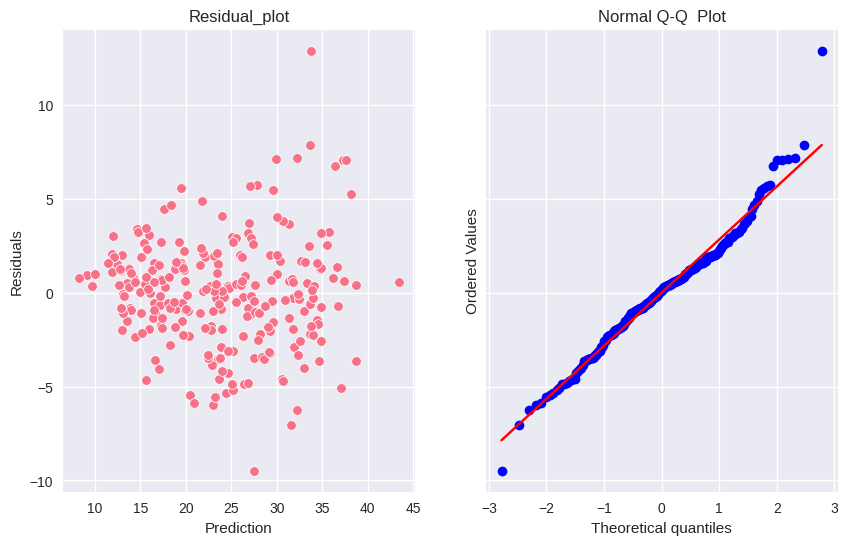

In [117]:
# Calling the above function,this will look into the final model of the residuals which we fitted for cross validation

residual_analysis_plots(model)

In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     128.4
Date:                Tue, 04 Nov 2025   Prob (F-statistic):          2.40e-100
Time:                        20:56:35   Log-Likelihood:                -627.87
No. Observations:                 255   AIC:                             1284.
Df Residuals:                     241   BIC:                             1333.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.4567     16.553     -0.269      0.788     -37.064      28.150
weight          -0.0175      0.003     -5.681      0.000      -0.024      -0.011
weight2       1.866e-06    4.5e-07      4.144      0.000    9.79e-07    2.75e-06
cylinders        0.3432      0.411      0.835      0.405      -0.467       1.153
displacement     0.0002      0.010      0.024      0.981      -0.019       0.019
horsepower      -0.0577      0.142     -0.406      0.685      -0.338       0.222
hp2             -0.0001      0.001     -0.133      0.894      -0.002       0.002
hp3           1.044e-06   2.64e-06      0.396      0.693   -4.15e-06    6.24e-06
acceleration     2.4276      2.919      0.832      0.406      -3.323       8.178
accel2          -0.2486      0.181     -1.372      0.171      -0.605       0.108
accel3           0.0068      0.004      1.821      0.070      -0.001       0.014
model year       0.8186      0.057     14.438      0.000       0.707       0.930
origin_2         1.4387      0.667      2.156      0.032       0.124       2.753
origin_3         1.3855      0.634      2.185      0.030       0.137       2.634
==============================================================================
Omnibus:                       17.767   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.667
Skew:                           0.322   Prob(JB):                     6.62e-09
Kurtosis:                       4.770   Cond. No.                     1.02e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
# Ordinary Least Squares Regression
# Fit an Ordinary Least Squares (OLS) regression model

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     168.9
Date:                Tue, 04 Nov 2025   Prob (F-statistic):          1.60e-130
Time:                        20:56:52   Log-Likelihood:                -775.80
No. Observations:                 318   AIC:                             1580.
Df Residuals:                     304   BIC:                             1632.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.0776     14.159      0.924      0.356     -14.785      40.940
weight          -0.0167      0.003     -6.320      0.000      -0.022      -0.012
weight2       1.891e-06   3.77e-07      5.013      0.000    1.15e-06    2.63e-06
cylinders        0.2441      0.351      0.695      0.488      -0.447       0.935
displacement    -0.0060      0.009     -0.682      0.496      -0.023       0.011
horsepower      -0.1220      0.123     -0.989      0.323      -0.365       0.121
hp2              0.0003      0.001      0.285      0.776      -0.002       0.002
hp3           1.504e-07   2.28e-06      0.066      0.948   -4.34e-06    4.64e-06
acceleration    -0.7738      2.467     -0.314      0.754      -5.628       4.080
accel2          -0.0383      0.150     -0.255      0.799      -0.334       0.257
accel3           0.0022      0.003      0.724      0.469      -0.004       0.008
model year       0.8319      0.050     16.504      0.000       0.733       0.931
origin_2         1.1942      0.588      2.032      0.043       0.038       2.351
origin_3         1.1885      0.559      2.125      0.034       0.088       2.289
==============================================================================
Omnibus:                       19.706   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.738
Skew:                           0.293   Prob(JB):                     5.24e-10
Kurtosis:                       4.698   Cond. No.                     1.02e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
# Evaluate the OLS model on the validation dataset

print(f"Test R2: {r2(y_val, model.predict(X_val),)}")
print(f"Test MAE: {mae(y_val, model.predict(X_val),)}")

Test R2: 0.904491024855651
Test MAE: 1.754401295186215


**Ridge Regression**:
Repeat the modelling process using ridge regression to see if the model fit better?

In [121]:
from sklearn.preprocessing import StandardScaler

# Standardizing features before Ridge regression (important for regularization)
std = StandardScaler()
X_m = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

Ridge Regression requires standardized features because regularization penalizes large coefficients, and we need all features on a similar scale.

In [122]:
from sklearn.linear_model import RidgeCV

# Defining a range of alpha (regularization strength) values for Ridge regression

n_alphas = 200
alphas = 10 ** np.linspace(-3,3,n_alphas)

# RidgeCV automatically selects the best alpha (regularization strength) using cross-validation.
# Cross-validated Ridge regression model

ridge_model = RidgeCV(alphas=alphas,cv=5)    # Using 5-fold cross-validation

ridge_model.fit(X_m,y)

print(ridge_model.score(X_m,y))
print(mae(y, ridge_model.predict(X_m)))
print(ridge_model.alpha_)

0.8780814921233104
2.061468464912701
0.18251834943190426




*   Train R2 = 0.8781 → Lower than OLS (0.904), indicating slight underfitting.
*   Train MAE = 2.0615 → Higher than OLS MAE (1.75), showing that Ridge did not improve accuracy.


*   Best Alpha = 0.1825 → This was the optimal penalty strength chosen via cross-validation.






In [123]:
# Evaluating Ridge model on Test Data

print(f"Test R2: {r2(y_test, ridge_model.predict(X_te))}")
print(f"Test MAE: {mae(y_test, ridge_model.predict(X_te))}")

Test R2: 0.8118036928109527
Test MAE: 2.217798943773171




*   Test R2 = 0.8118 → Worse than OLS (0.904), indicating Ridge did not generalize better.
*   Test MAE = 2.2178 → Higher than OLS MAE (1.75), meaning Ridge increased the prediction error.

**Conclusion**
**Ridge Regression did not significantly improve the model. We will stick with OLS.**
Ridge regression did not significantly improve generalization.
The OLS model has better R2 (0.904) and lower MAE (1.75 MPG) compared to Ridge.
Multicollinearity was not a major issue, meaning regularization was unnecessary.